MachineLearning - Week 4 Assignment

In [ ]:
#Importing input
import numpy as np
import pandas as pd
df=pd.read_csv("Week4 Dataset1.csv", skiprows=[0], names=["X1","X2","y"])
print(df.head())
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

#Knowing the input data
print(np.shape(df))
print(min(X1), max(X1))
print(min(X2), max(X2))
print(min(y), max(y))

In [ ]:
#Visualizing the input datsets
# %matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1,X2,y, label = "Training Data")
ax.set_xlabel("X_1", fontweight ='bold').set_color('red')
ax.set_ylabel("X_2", fontweight ='bold').set_color('red')
ax.set_zlabel("y", fontweight ='bold').set_color('red')
ax.legend()
# ax.view_init(0, 90)
ax.set_title("Training data", fontweight ='bold').set_color('red')

In [ ]:
def splitNaddPoly(X, y, n=5, gridRange=2):
    ####Splitting the model into train, and test
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y) # --> Return ytrain, ytest

    ####Adding extra polynomial features equal to all combinations of powers of the two features up to power n
    from sklearn.preprocessing import PolynomialFeatures
    Xtrain_poly = PolynomialFeatures(n).fit_transform(Xtrain) # --> Return Xtrain_poly
    Xtest_poly = PolynomialFeatures(n).fit_transform(Xtest) # --> Return Xtest_poly
    X_poly = PolynomialFeatures(n).fit_transform(X)

    ####Grid of feature values, to use for predictions
    # Xt=[]
    # grid=np.linspace(-gridRange,gridRange)
    # for i in grid:
    #     for j in grid:
    #         Xt.append([i,j])
    # Xt = np.array(Xt) #### Return Xt
    # Xtest = PolynomialFeatures(n).fit_transform(Xt) #### Return Xtest
    
    return Xtrain_poly, Xtest_poly, ytrain, ytest

In [ ]:
def logisticRegression(Xtrain_poly, Xtest_poly, ytrain, ytest, c):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(penalty='l2', C= c,max_iter=1000).fit(Xtrain_poly, ytrain)
    prediction = model.predict(Xtest_poly)
    return model, prediction

In [ ]:
def modelResults(testY,model, prediction,c ):
    print("C = ", c)
    print(f"Model Intercept = {model.intercept_}")
    print(f"Model Coefficient = {model.coef_.tolist()}")
    from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    # print(scores)
    print("Accuracy (for 5 fold cross validation): %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))

    print("Confusion matrix:")
    print(confusion_matrix(testY,prediction))
    print("Classification report:")
    print(classification_report(testY,prediction))

    # print("Mean square error =", mean_squared_error(testY,prediction))

    # Xt=[]
    # grid=np.linspace(-2,2)
    # for i in grid:
    #     for j in grid:
    #         Xt.append([i,j])
    # Xt = np.array(Xt)


    # %matplotlib widget
    # import matplotlib.pyplot as plt
    # from mpl_toolkits.mplot3d import Axes3D
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(X1,X2,y, label = "Training Data")
    # ax.plot_trisurf(Xtest_poly[:,1], Xtest_poly[:,2], prediction)
    # ax.set_xlabel("X_1", fontweight ='bold').set_color('red')
    # ax.set_ylabel("X_2", fontweight ='bold').set_color('red')
    # ax.set_zlabel("y", fontweight ='bold').set_color('red')
    # ax.legend(fontsize = 'medium')
    # ax.set_title(f"Training data and Prediction curve with penality C = {c}", fontweight ='bold').set_color('red')
    # plt.show()

    # xmin, xmax = -3, 3
    # ymin, ymax = -3, 3
    # xd = np.array([xmin, xmax])

    # plt.figure()
    # plt.rc('font', size =12)
    # plt.rcParams['figure.constrained_layout.use'] = True
    # plt.scatter(X1, y, X2, c='b',marker='o') 
    # # plt.scatter(X1[y==-1],X2[y==-1],c='b',marker='o', label=r'$y_t=-1$')
    # ##_____
    # ##_____
    # # plt.plot(xd, yd, 'black', lw=2)
    # plt.xlim(xmin, xmax)
    # plt.ylim(ymin, ymax)
    # plt.ylabel('X_2')
    # plt.xlabel('X_1')
    # plt.legend()
    # plt.title("Predicted target over training data, LR model with original features", loc='center')
    # plt.show()


In [ ]:
def dummyRegressor(Xtrain_poly, Xtest_poly, ytrain, ytest):
    from sklearn.dummy import DummyRegressor
    dummy = DummyRegressor(strategy='mean').fit(Xtrain_poly, ytrain)
    ydummy = dummy.predict(Xtest_poly)
    from sklearn.metrics import mean_squared_error
    print('Mean square error (Dummy) = %f'%(mean_squared_error(ytest,ydummy)))

In [ ]:
def dummyClassifier(Xtrain_poly, Xtest_poly, ytrain, ytest):   
   from sklearn.dummy import DummyClassifier
   dummy = DummyClassifier(strategy='most_frequent').fit(Xtrain_poly, ytrain)
   ydummy = dummy.predict(Xtest_poly)
   from sklearn.metrics import confusion_matrix, classification_report

   print("Confusion matrix:")
   print(confusion_matrix(ytest, ydummy))
   print("Classification report:")
   print(classification_report(ytest, ydummy))

In [29]:
def errorBar(Xtrain_poly, Xtest_poly, ytrain, ytest):
    mean_error=[]
    std_error=[]
    Ci_range = [0.01, 0.1, 1, 5, 10, 25, 50, 100, 1000]
    for Ci in Ci_range:
        model, prediction = logisticRegression(Xtrain_poly, Xtest_poly, ytrain, ytest, Ci)
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(model, Xtrain_poly, ytrain, cv=5, scoring='f1')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())

    import matplotlib.pyplot as plt
    plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
    plt.errorbar(Ci_range,mean_error,yerr=std_error,linewidth=3)

    plt.xlabel('Weight(C)'); plt.ylabel('F1 Score')
    plt.xlim((0,150))
    plt.title("F1 Score vs C")
    plt.show()

In [38]:
def rocCurve(Xtrain_poly, Xtest_poly, ytrain, ytest):
    model, prediction = logisticRegression(Xtrain_poly, Xtest_poly, ytrain, ytest, 10)
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(ytest,model.decision_function(Xtest_poly))
    import matplotlib.pyplot as plt
    plt.plot(fpr,tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.plot([0, 1], [0, 1], color='green')
    plt.show()

In [ ]:
penalty = np.array([0.1, 1, 10, 100])
Xtrain_poly, Xtest_poly, ytrain, ytest = splitNaddPoly(X, y, 5)

In [ ]:
model1, prediction1 = logisticRegression(Xtrain_poly, Xtest_poly, ytrain, ytest, 1)
modelResults(ytest, model1, prediction1, 1)
dummyClassifier(Xtrain_poly, Xtest_poly, ytrain, ytest)

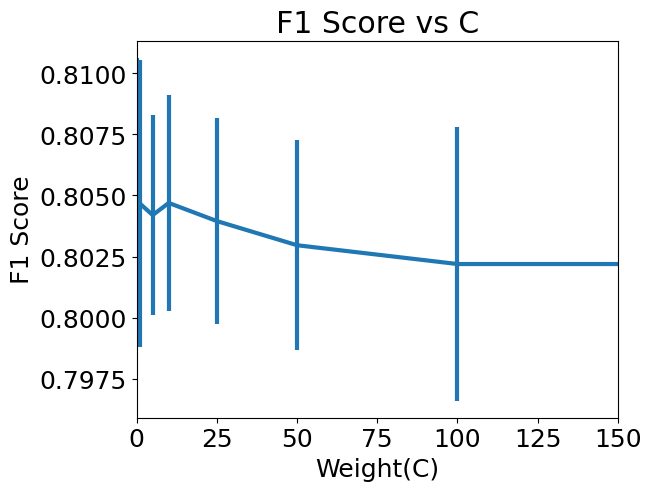

In [30]:
errorBar(Xtrain_poly, Xtest_poly, ytrain, ytest)

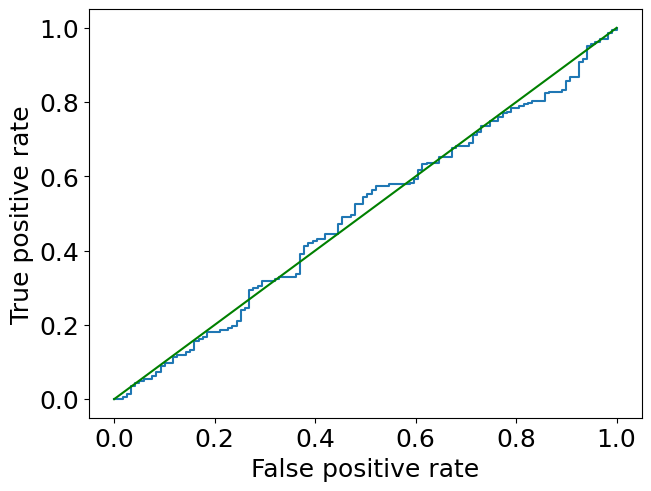

In [39]:
rocCurve(Xtrain_poly, Xtest_poly, ytrain, ytest)